In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("Data Covid19.csv")
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,1/22/2020 17:00,444,17,28
1,Hubei,Mainland China,1/23/2020 17:00,444,17,28
2,Hubei,Mainland China,1/23/2020 17:00,444,17,28
3,Hubei,Mainland China,1/24/2020 17:00,549,24,31
4,Hubei,Mainland China,1/25/2020 17:00,761,40,32


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114358 entries, 0 to 114357
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Province/State  114358 non-null  object
 1   Country/Region  114358 non-null  object
 2   Last Update     114358 non-null  object
 3   Confirmed       114358 non-null  int64 
 4   Deaths          114358 non-null  int64 
 5   Recovered       114358 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 5.2+ MB


In [4]:
data['Last Update'].unique()

array(['1/22/2020 17:00', '1/23/2020 17:00', '1/24/2020 17:00', ...,
       '26/02/2021 05.22', '27/02/2021 05.22', '28/02/2021 05.22'],
      dtype=object)

In [5]:
latest_date = '28/02/2021 05.22'
data[data['Last Update']==latest_date]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
113959,Abruzzo,Italy,28/02/2021 05.22,53900,1698,39479
113960,Acre,Brazil,28/02/2021 05.22,57337,996,46623
113961,Adygea Republic,Russia,28/02/2021 05.22,13772,149,12159
113962,Aichi,Japan,28/02/2021 05.22,25858,515,24524
113963,Akita,Japan,28/02/2021 05.22,269,6,260
...,...,...,...,...,...,...
114353,Zabaykalsky Krai,Russia,28/02/2021 05.22,38523,528,36849
114354,Zakarpattia Oblast,Ukraine,28/02/2021 05.22,39830,900,30516
114355,Zaporizhia Oblast,Ukraine,28/02/2021 05.22,69504,1132,65049
114356,Zhejiang,Mainland China,28/02/2021 05.22,1321,1,1314


In [6]:
unique_countries = data[data.Confirmed > 0]['Country/Region'].unique()
unique_countries.sort()
unique_countries

array(['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'France', 'Germany', 'Hong Kong', 'India', 'Italy', 'Japan',
       'Mainland China', 'Mexico', 'Netherlands', 'Others', 'Pakistan',
       'Peru', 'Russia', 'Spain', 'Taiwan', 'UK', 'US', 'Ukraine'],
      dtype=object)

In [7]:
country_confirmed_case = []
for i in unique_countries:
    country_confirmed_case.append(data[data.Confirmed > 0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())

C:\Users\62812\AppData\Local\Temp\ipykernel_11168\3560994837.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed > 0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\3560994837.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed > 0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\3560994837.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_case.append(data[data.Confirmed > 0][data['Country/Region']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\3560994837.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_confirmed_cas

In [8]:
print(set(zip(unique_countries, country_confirmed_case)))

{('Japan', 430795), ('Denmark', 658), ('Pakistan', 579973), ('Brazil', 10517232), ('Mainland China', 88855), ('Australia', 23688), ('US', 0), ('Canada', 869154), ('India', 11096731), ('Mexico', 0), ('Colombia', 2248135), ('Ukraine', 1389570), ('Hong Kong', 10983), ('Taiwan', 0), ('Others', 0), ('France', 83122), ('Germany', 2442582), ('Chile', 821418), ('UK', 12177), ('Italy', 2907825), ('Netherlands', 14854), ('Spain', 3188553), ('Peru', 7500), ('Russia', 4187166)}


In [9]:
unique_province = data['Province/State'][data.Confirmed > 1].unique()
unique_province

array(['Hubei', 'Shanghai', 'Beijing', 'Henan', 'Sichuan', 'Hainan',
       'Chongqing', 'Heilongjiang', 'Hebei', 'Tianjin', 'Guizhou',
       'Guangdong', 'Jilin', 'Hunan', 'Gansu', 'Anhui', 'Shandong',
       'Guangxi', 'Jiangxi', 'Liaoning', 'Hong Kong', 'Xinjiang',
       'Taiwan', 'Yunnan', 'Zhejiang', 'Diamond Princess cruise ship',
       'Fujian', 'Shaanxi', 'Seattle, WA', 'King County, WA',
       'Inner Mongolia', 'New South Wales', 'British Columbia',
       'Washington', 'California', 'France', 'UK', 'United Kingdom',
       'Denmark', 'Netherlands', 'New Jersey', 'Kentucky', 'Ontario',
       'Illinois', 'Western Australia', 'French Polynesia', 'Curacao',
       'Queensland', 'Victoria', 'Guadeloupe',
       'Australian Capital Territory', 'St Martin', 'Martinique',
       'Mayotte', 'Tasmania', 'Sint Maarten', 'Channel Islands',
       'Cayman Islands', 'Bermuda', 'Isle of Man', 'South Australia',
       'Aruba', 'British Virgin Islands', 'French Guiana',
       'Turks an

In [10]:
province_confirmed_case = []
for i in unique_province:
    province_confirmed_case.append(data[data.Confirmed > 0 ][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())

C:\Users\62812\AppData\Local\Temp\ipykernel_11168\591046142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed > 0 ][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\591046142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed > 0 ][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\591046142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_case.append(data[data.Confirmed > 0 ][data['Province/State']==i][data['Last Update']==latest_date].Confirmed.sum())
C:\Users\62812\AppData\Local\Temp\ipykernel_11168\591046142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_confirmed_

In [11]:
print(set(zip(unique_province, province_confirmed_case)))

{('Lviv Oblast', 78519), ('Newfoundland and Labrador', 981), ('Ladakh', 9818), ('Stavropol Krai', 47228), ('Tianjin', 356), ('Biobio', 72394), ('Beijing', 1047), ('Paraiba', 219723), ('Kagoshima', 1761), ('Mexico', 0), ('Channel Islands', 4034), ('Tripura', 33417), ('Akita', 269), ('Rajasthan', 320180), ('Faroe Islands', 658), ('Bahia', 680904), ('Saarland', 28921), ('Meta', 42297), ('Campeche', 0), ('West Bengal', 574926), ('Michigan', 0), ('Sikkim', 6137), ('California', 0), ('Campania', 265058), ('Chihuahua', 0), ('Ryazan Oblast', 24415), ('Himachal Pradesh', 58598), ('Altai Krai', 43399), ('Basilicata', 15534), ('Chelyabinsk Oblast', 50633), ('Cundinamarca', 105433), ('Saint Petersburg', 366238), ('Chhattisgarh', 312419), ('Port Quarantine', 2230), ('Atlantico', 123262), ('Cordoba', 37070), ('Sindh', 258004), ('Zhytomyr Oblast', 50582), ('Narino', 48858), ('Queensland', 1329), ('Kaliningrad Oblast', 28111), ('Lombardia', 599552), ('Yamanashi', 941), ('New Jersey', 0), ('Durango', 0

In [12]:
nan_indices = []
for i in range(len(unique_province)):
    if type(unique_province[i])==float:
        nan_indices.append(i)

In [13]:
unique_province = list(unique_province)
province_confirmed_case = list(province_confirmed_case)

In [14]:
for i in nan_indices:
    unique_province.pop(i)
    province_confirmed_case.pop(i)

unique_province

['Hubei',
 'Shanghai',
 'Beijing',
 'Henan',
 'Sichuan',
 'Hainan',
 'Chongqing',
 'Heilongjiang',
 'Hebei',
 'Tianjin',
 'Guizhou',
 'Guangdong',
 'Jilin',
 'Hunan',
 'Gansu',
 'Anhui',
 'Shandong',
 'Guangxi',
 'Jiangxi',
 'Liaoning',
 'Hong Kong',
 'Xinjiang',
 'Taiwan',
 'Yunnan',
 'Zhejiang',
 'Diamond Princess cruise ship',
 'Fujian',
 'Shaanxi',
 'Seattle, WA',
 'King County, WA',
 'Inner Mongolia',
 'New South Wales',
 'British Columbia',
 'Washington',
 'California',
 'France',
 'UK',
 'United Kingdom',
 'Denmark',
 'Netherlands',
 'New Jersey',
 'Kentucky',
 'Ontario',
 'Illinois',
 'Western Australia',
 'French Polynesia',
 'Curacao',
 'Queensland',
 'Victoria',
 'Guadeloupe',
 'Australian Capital Territory',
 'St Martin',
 'Martinique',
 'Mayotte',
 'Tasmania',
 'Sint Maarten',
 'Channel Islands',
 'Cayman Islands',
 'Bermuda',
 'Isle of Man',
 'South Australia',
 'Aruba',
 'British Virgin Islands',
 'French Guiana',
 'Turks and Caicos Islands',
 'Montserrat',
 'Abruzzo',
 

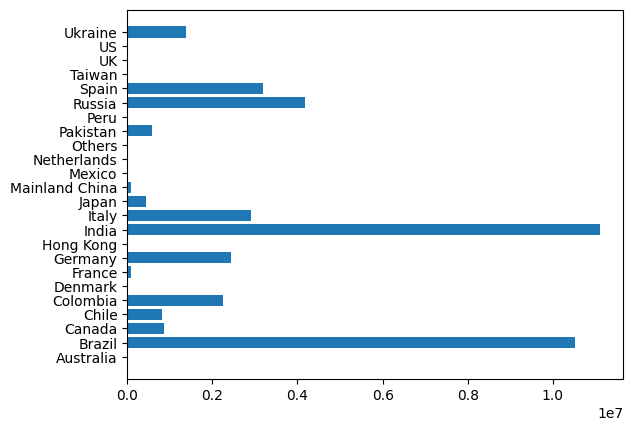

In [15]:
plt.barh(unique_countries, country_confirmed_case)
plt.show()

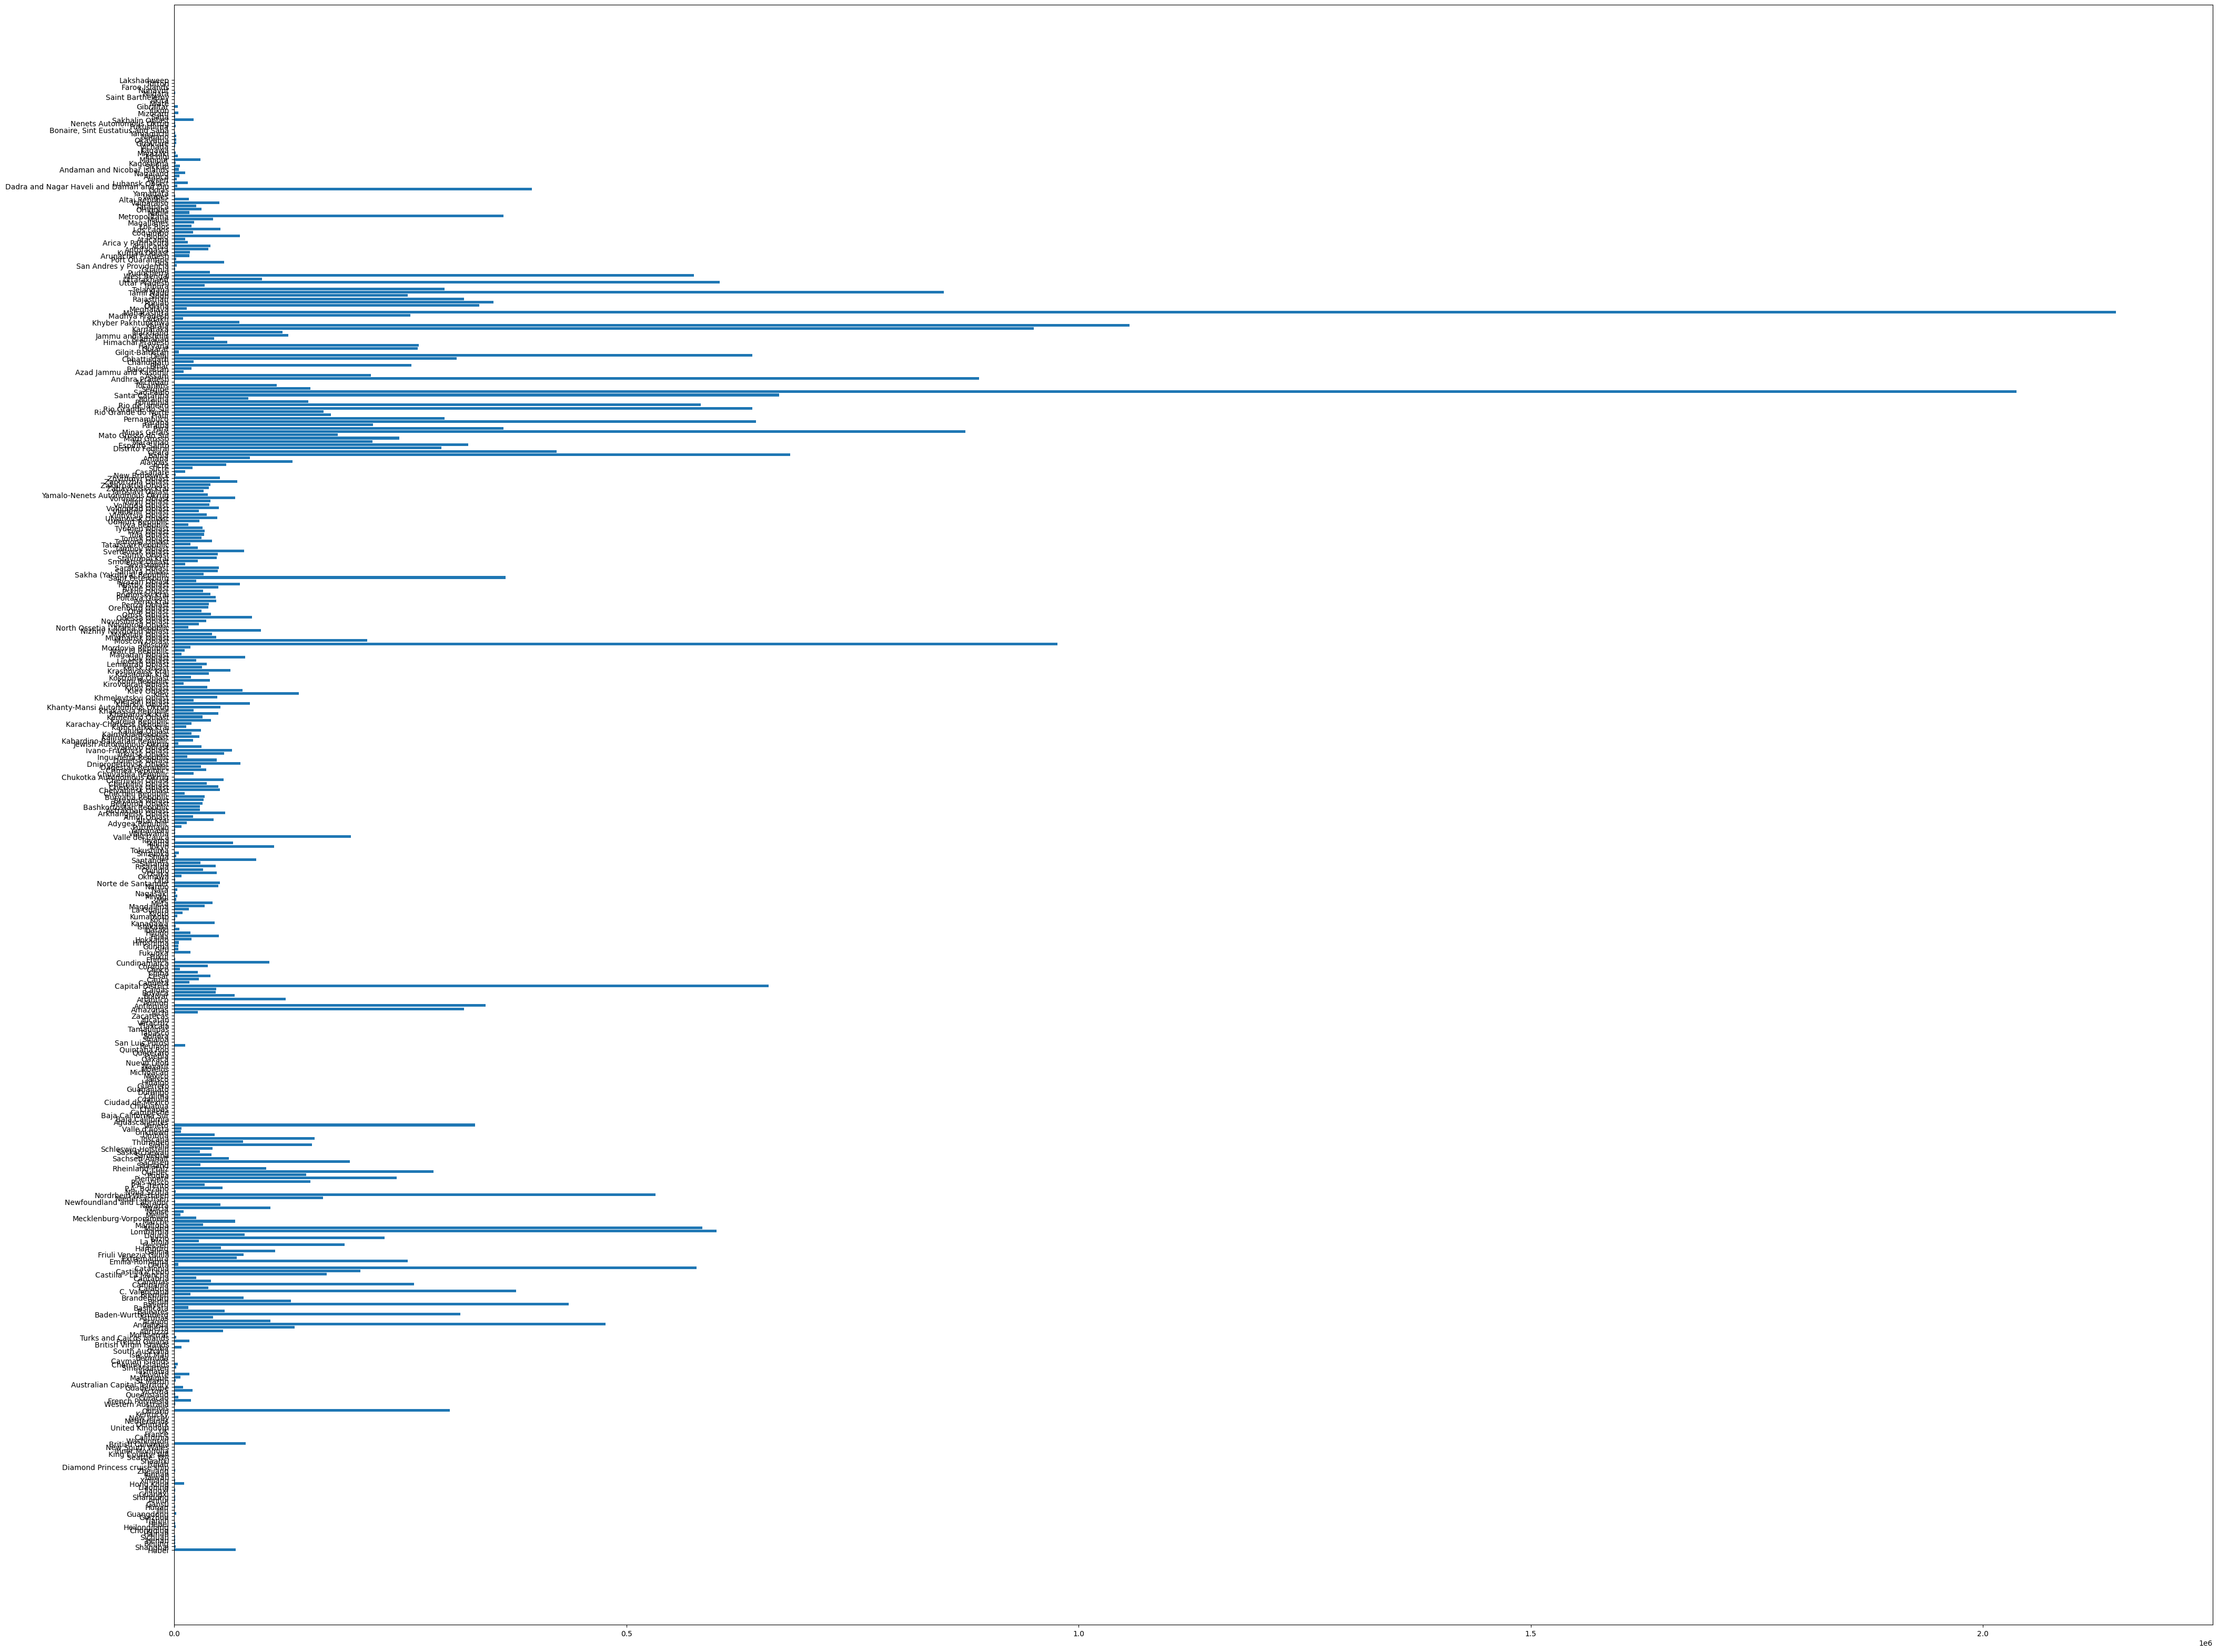

In [16]:
plt.figure(figsize=(50, 40))
plt.barh(unique_province, province_confirmed_case)
plt.show()

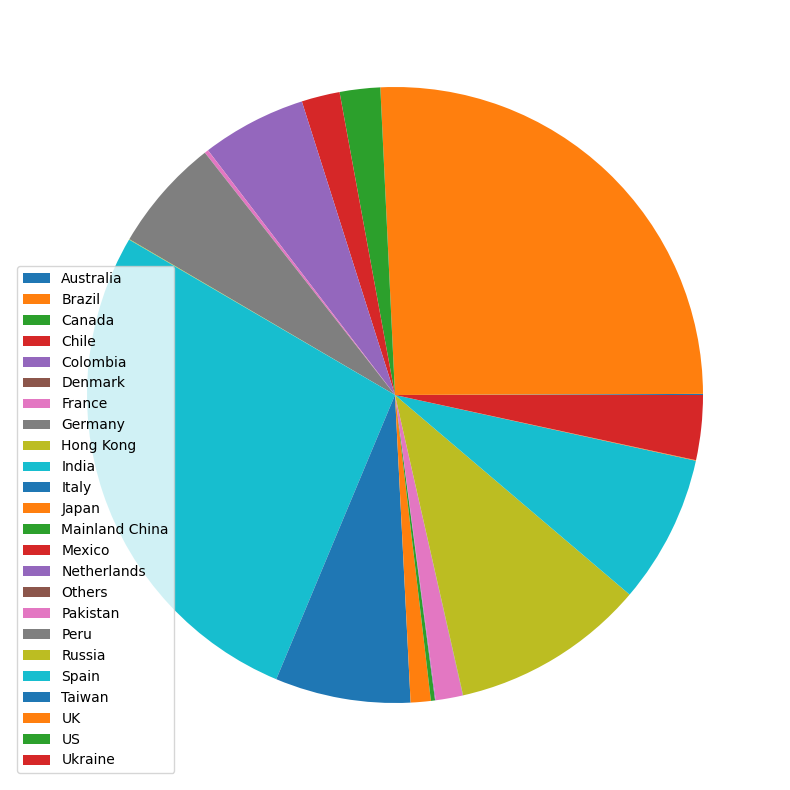

In [17]:
plt.figure(figsize=(10,10))
plt.pie(country_confirmed_case)
plt.legend(unique_countries, loc='best')
plt.show()

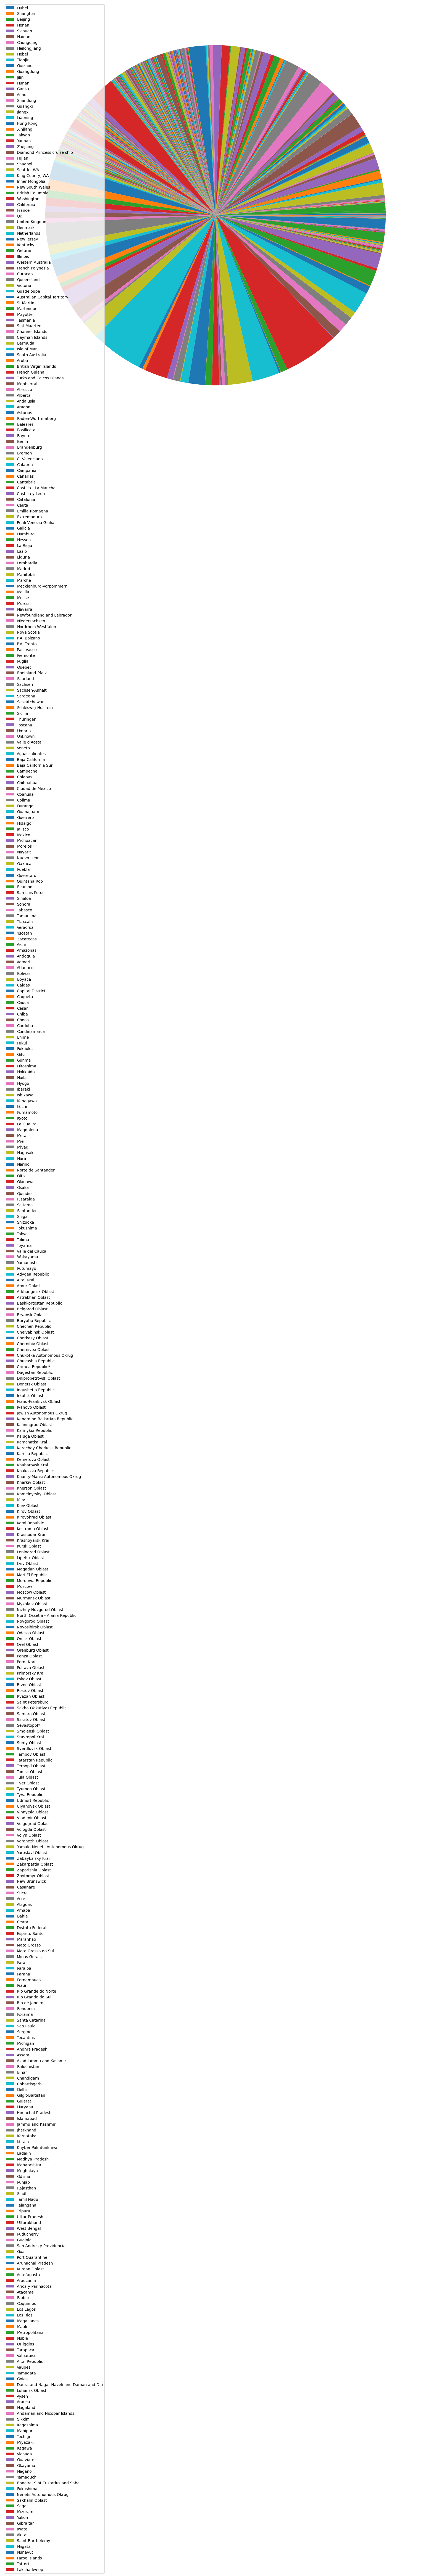

In [18]:
plt.figure(figsize=(20,20))
plt.pie(province_confirmed_case)
plt.legend(unique_province, loc='best')
plt.show()